#### Setting All Environment Variables With LangSmith Settings ??

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

os.environ["LANGSMITH_API_KEY"] = os.getenv("LANGSMITH_API_KEY")
os.environ["LANGSMITH_PROJECT"] = "LangGraphMonitoring"
os.environ["LANGSMITH_TRACING"]="true"

#### Initialize The LLM ??

In [2]:
from langchain.chat_models import init_chat_model

llm = init_chat_model(model="groq:llama-3.3-70b-versatile")

llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002021C00C050>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002021C105FD0>, model_name='llama-3.3-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

#### ALL Imports ??

In [3]:
from typing import List, Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

from langgraph.graph import END, START
from langgraph.graph.state import StateGraph
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import BaseMessage

#### Define Our State Pydanic Schema ??

In [4]:
class State(TypedDict):
    messages: Annotated[List[BaseMessage], add_messages]

#### Create My Custom Tool ??

In [5]:
@tool
def add(a: float, b: float) -> float:
    """Add two numbers."""
    return a + b

In [6]:
## Initialize the tool node with the custom tool
tools = [add]
tool_node = ToolNode(tools=tools)

In [7]:
## Bind The tool node to the llm
llm_with_tools = llm.bind_tools(tools=tools)

In [8]:
## Node Defination For Calling the LLM ??
def call_llm_model(state: State):
    return {
        "messages": [llm_with_tools.invoke(state["messages"])]
    }

#### Build The Graph ??

In [9]:
## Initialize the state graph
graph_builder = StateGraph(State)

In [10]:
## ADD All nodes to the graph
graph_builder.add_node("Call LLM", call_llm_model)
graph_builder.add_node("tools", tool_node)

In [11]:
## ADD All Edges to the graph
graph_builder.add_edge(START, "Call LLM")
graph_builder.add_conditional_edges(
    "Call LLM",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
graph_builder.add_edge("tools", END)

In [13]:
## Compile the graph
graph = graph_builder.compile()

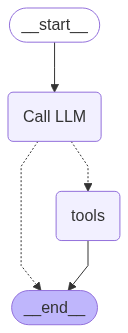

In [14]:
## Display the graph
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
response = graph.invoke({"messages":"What is machine learning"})

response

{'messages': [HumanMessage(content='What is machine learning', additional_kwargs={}, response_metadata={}, id='7ff20c7e-6ea3-433f-81a5-b8db6126b609'),
  AIMessage(content='Machine learning is a subfield of artificial intelligence (AI) that involves the use of algorithms and statistical models to enable machines to perform a specific task without using explicit instructions. Instead, the machine learns from data, making predictions or decisions based on that data.\n\nThere are several types of machine learning, including:\n\n1. Supervised learning: The machine is trained on labeled data, where the correct output is already known.\n2. Unsupervised learning: The machine is trained on unlabeled data, and it must find patterns or structure in the data on its own.\n3. Reinforcement learning: The machine learns by interacting with an environment and receiving rewards or penalties for its actions.\n\nMachine learning has many applications, including:\n\n1. Image and speech recognition\n2. Natu

In [16]:
print(response["messages"][-1].content)

Machine learning is a subfield of artificial intelligence (AI) that involves the use of algorithms and statistical models to enable machines to perform a specific task without using explicit instructions. Instead, the machine learns from data, making predictions or decisions based on that data.

There are several types of machine learning, including:

1. Supervised learning: The machine is trained on labeled data, where the correct output is already known.
2. Unsupervised learning: The machine is trained on unlabeled data, and it must find patterns or structure in the data on its own.
3. Reinforcement learning: The machine learns by interacting with an environment and receiving rewards or penalties for its actions.

Machine learning has many applications, including:

1. Image and speech recognition
2. Natural language processing
3. Predictive modeling
4. Recommendation systems
5. Autonomous vehicles

Some common machine learning algorithms include:

1. Linear regression
2. Decision tre

In [18]:
response = graph.invoke({"messages":"Compute 3211 + 1252 and then explain me what is Quantum Machine Learning?"})

print(response["messages"][-1].content)

4463.0


In [19]:
response

{'messages': [HumanMessage(content='Compute 3211 + 1252 and then explain me what is Quantum Machine Learning?', additional_kwargs={}, response_metadata={}, id='107f290c-dce9-4989-bde5-5c9d2c960562'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '26hed274n', 'function': {'arguments': '{"a":3211,"b":1252}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 115, 'prompt_tokens': 230, 'total_tokens': 345, 'completion_time': 0.304297404, 'prompt_time': 0.024450943, 'queue_time': 0.084467468, 'total_time': 0.328748347}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9a8b91ba77', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--fa0a97d4-23a3-44c4-8aac-d9323d815d0e-0', tool_calls=[{'name': 'add', 'args': {'a': 3211, 'b': 1252}, 'id': '26hed274n', 'type': 'tool_call'}], usage_metadata={'input_tokens': 230, 'output_tokens': 115, 'total_tokens': 345}),
  ToolMessage(content=

In [20]:
response = graph.invoke({"messages":"What is 65 plus 35?"})

response

{'messages': [HumanMessage(content='What is 65 plus 35?', additional_kwargs={}, response_metadata={}, id='657f6310-4735-441b-8d8f-9cf6c2fda6ad'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ac14b61ps', 'function': {'arguments': '{"a":65,"b":35}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 220, 'total_tokens': 235, 'completion_time': 0.039018582, 'prompt_time': 0.025432278, 'queue_time': 0.086150322, 'total_time': 0.06445086}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0532e13f-fde4-4dd4-b411-9e48451d83ce-0', tool_calls=[{'name': 'add', 'args': {'a': 65, 'b': 35}, 'id': 'ac14b61ps', 'type': 'tool_call'}], usage_metadata={'input_tokens': 220, 'output_tokens': 15, 'total_tokens': 235}),
  ToolMessage(content='100.0', name='add', id='cce4180b-e03b-4452-a96c-ac35b78802ee', t

In [21]:
print(response["messages"][-1].content)

100.0
